<a href="https://colab.research.google.com/github/ANAGHA-SREYAS/Unified_mentor_internship/blob/main/FIFA_wolrd_cup_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing & Understanding the dataset

In [5]:
matches=pd.read_csv('/content/WorldCupMatches.csv')
world_cup=pd.read_csv('/content/WorldCups.csv')

In [15]:
matches.shape

(850, 20)

In [18]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [16]:
world_cup.shape

(20, 10)

In [19]:
world_cup.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [6]:
matches.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [7]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [20]:
#checking null values
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [9]:
matches.dropna(inplace=True)

In [10]:
world_cup.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

# Exploratory data analysis

Number of goals per tournament

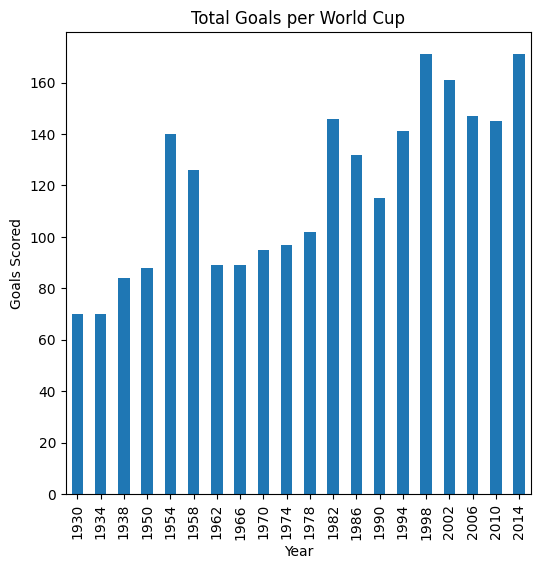

In [21]:
# Group by year and sum goals
goals_per_tournament = world_cup.groupby('Year')['GoalsScored'].sum()

# Plot goals per tournament
goals_per_tournament.plot(kind='bar', figsize=(6, 6))
plt.title('Total Goals per World Cup')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()


Top goal scored country

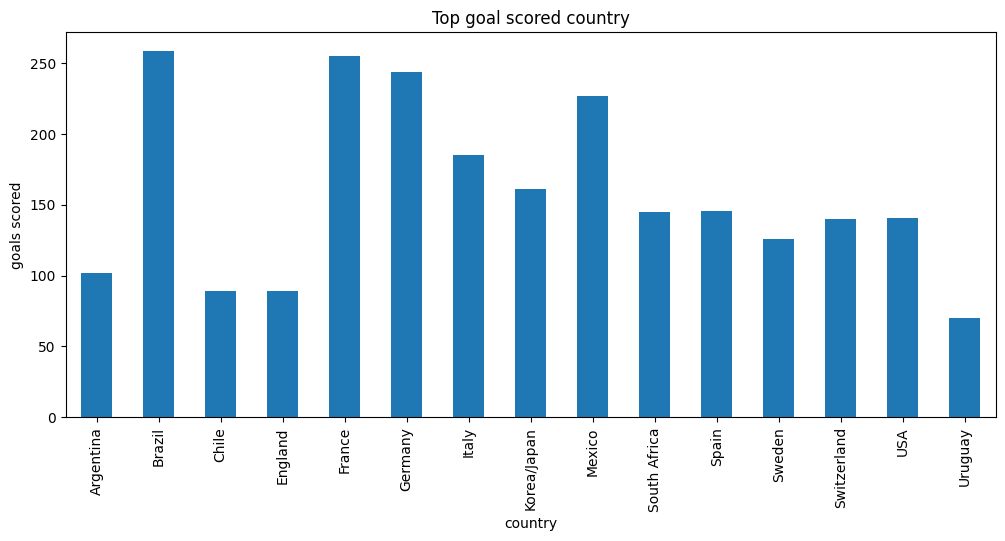

In [24]:
#groupby country and sum of goals
country_goals=world_cup.groupby('Country')['GoalsScored'].sum()
country_goals.plot(kind='bar',figsize=(12,5))
plt.title('Top goal scored country')
plt.xlabel('country')
plt.ylabel('goals scored')
plt.show()

 Attendance by year

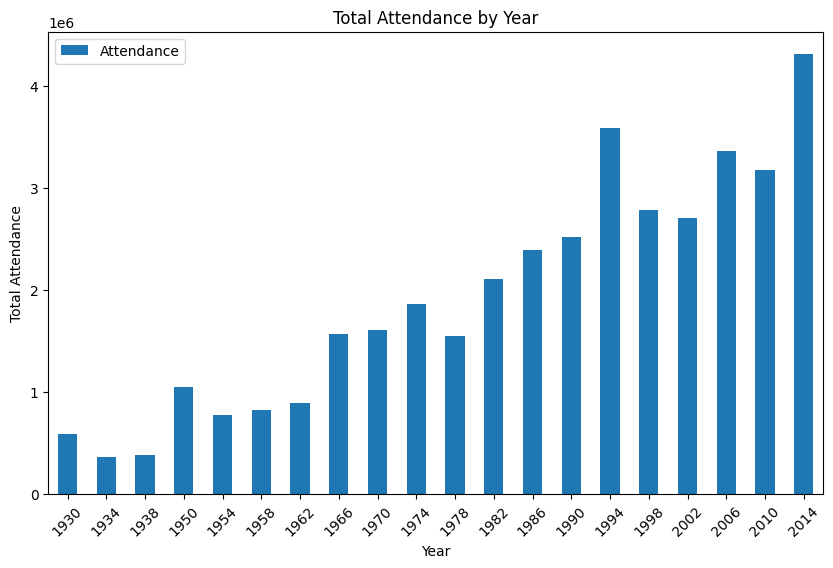

In [13]:
attendance_year = matches.groupby('Year')['Attendance'].sum().reset_index()
attendance_year['Year'] = attendance_year['Year'].astype(int)
attendance_year.set_index('Year', inplace=True)

attendance_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.title('Total Attendance by Year')
plt.xticks(rotation=45)
plt.show()


Prediction and Evaluation

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Merge the datas on 'Year'
data = pd.merge(matches, world_cup, on='Year',how='inner')

# Feature Engineering: Example features
data['Total Goals'] = data['Home Team Goals'] + data['Away Team Goals']
data['Goal Difference'] = data['Home Team Goals'] - data['Away Team Goals']
data['Match Result'] = data.apply(lambda x: 1 if x['Home Team Goals'] > x['Away Team Goals'] else (0 if x['Home Team Goals'] == x['Away Team Goals'] else -1), axis=1)

# Select features and target
features = ['Total Goals', 'Goal Difference', 'Attendance_x']
target = 'Match Result'

# Prepare the data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



# Dictionary to hold the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("\n" + "-"*60 + "\n")


Classifier: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        38
           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        97

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170


------------------------------------------------------------

Classifier: Support Vector Machine
Accuracy: 0.5705882352941176
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        38
           0       0.00      0.00      0.00        35
           1       0.57      1.00      0.73        97

    accuracy                           0.57       170
   macro avg       0.19      0.33      0.24       170
weighted avg       0.33      0.57      0.41       170


----------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Gradient Boosting
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        38
           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        97

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170


------------------------------------------------------------



​

Random forest and gradient boosting are best fit models with accuracy of1.​

Logistic regression also performs well.​

SVM and KNN are comparatively less accurate models